   Feature  Information_Gain
13     V14          0.509691
16     V17          0.459194
9      V10          0.451169
11     V12          0.440168
3       V4          0.420958
10     V11          0.411371
2       V3          0.366319
15     V16          0.357713
6       V7          0.303475
1       V2          0.281675
8       V9          0.268695
20     V21          0.239920
26     V27          0.231969
17     V18          0.224966
0       V1          0.210401
5       V6          0.183640
27     V28          0.177880
4       V5          0.175473
7       V8          0.154103
18     V19          0.123986
19     V20          0.117783
23     V24          0.078059
22     V23          0.068074
25     V26          0.057492
24     V25          0.040850
21     V22          0.034232
14     V15          0.027437
12     V13          0.026126
28  Amount          0.000000


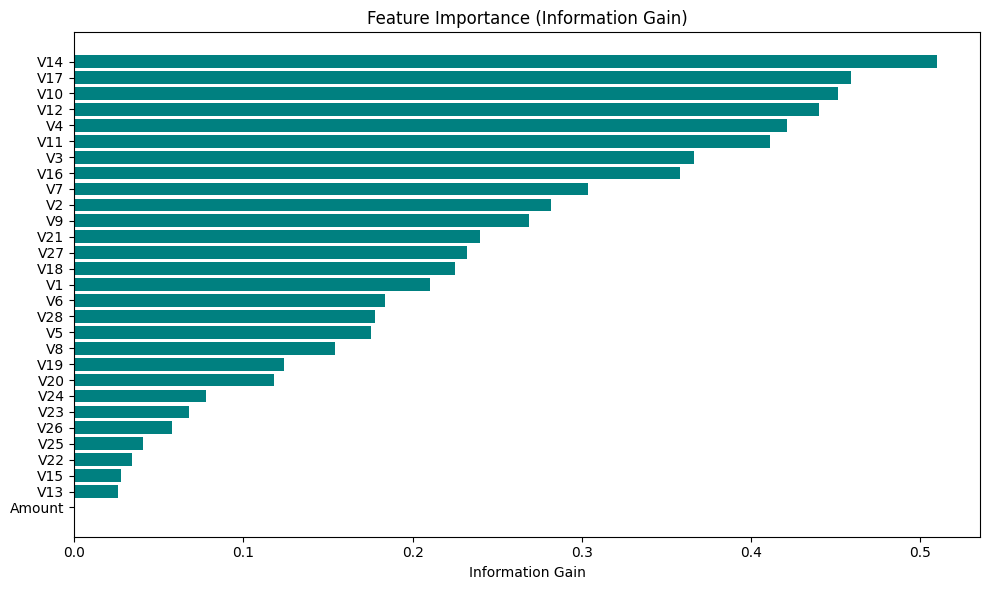

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../datasets/creditcard_2023.csv")

# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Scale features (recommended for mutual_info)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mutual information
info_gain = mutual_info_classif(X_scaled, y, random_state=42)

# Create a DataFrame for display
info_df = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': info_gain
}).sort_values(by='Information_Gain', ascending=False)

# Display table
print(info_df)

# Optional: Plot top features
plt.figure(figsize=(10, 6))
plt.barh(info_df['Feature'], info_df['Information_Gain'], color='teal')
plt.xlabel("Information Gain")
plt.title("Feature Importance (Information Gain)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_df = pd.read_csv("../datasets/fraudTrain.csv")

# Drop identifier and personal columns
drop_cols = ['id', 'cc_num', 'first', 'last', 'trans_num', 'street', 'unix_time']
train_df = train_df.drop(columns=[col for col in drop_cols if col in train_df.columns])

# Convert datetime to time features
for df in [train_df]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

    # Compute age in years at time of transaction
    df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days / 365.25
    df['age'] = df['age'].fillna(df['age'].median())  # Handle any NaT values
    
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['trans_day'] = df['trans_date_trans_time'].dt.day
    df['trans_weekday'] = df['trans_date_trans_time'].dt.weekday
    df.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)

# Target variable
y_train = train_df['is_fraud']

# Drop target from features
X_train = train_df.drop(columns=['is_fraud'])

# Identify categorical and numeric columns
categorical_cols = ['merchant', 'category', 'gender', 'job', 'city', 'state']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)

# Final shape confirmation
print("X_train shape:", X_train_transformed.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1296675, 2159)
y_train shape: (1296675,)


In [14]:
train_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'trans_hour', 'trans_day', 'trans_weekday'],
      dtype='object')

In [ ]:



# Compute mutual information
info_gain = mutual_info_classif(X_train_transformed, y, random_state=42)

# Create a DataFrame for display


C:\Users\Abeer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Abeer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Abeer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Abeer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label,

AttributeError: 'csr_matrix' object has no attribute 'columns'

In [12]:
X_train_transformed

<1296675x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 22043475 stored elements in Compressed Sparse Row format>

In [17]:
len(info_gain)

2159

In [21]:
# Fit the preprocessor
preprocessor.fit(X_train)

# Get feature names from numeric part
numeric_features = numerical_cols

# Get feature names from OneHotEncoder
ohe = preprocessor.named_transformers_['cat']
categorical_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine them
all_feature_names = list(numeric_features) + list(categorical_feature_names)

# Transform the data
X_train_transformed_2 = preprocessor.transform(X_train)

# If sparse, convert
if hasattr(X_train_transformed_2, 'toarray'):
    X_train_transformed_2 = X_train_transformed_2.toarray()

# Confirm shape match
print("Expected columns:", len(all_feature_names))
print("Transformed shape:", X_train_transformed_2.shape)

# Convert to DataFrame
import pandas as pd
X_train_df = pd.DataFrame(X_train_transformed_2, columns=all_feature_names)

# View the first rows
print(X_train_df.head())

MemoryError: Unable to allocate 20.9 GiB for an array with shape (1296675, 2159) and data type float64

In [19]:
all_feature_names

['amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'age',
 'trans_hour',
 'trans_day',
 'trans_weekday',
 'merchant_fraud_Abbott-Rogahn',
 'merchant_fraud_Abbott-Steuber',
 'merchant_fraud_Abernathy and Sons',
 'merchant_fraud_Abshire PLC',
 'merchant_fraud_Adams, Kovacek and Kuhlman',
 'merchant_fraud_Adams-Barrows',
 'merchant_fraud_Altenwerth, Cartwright and Koss',
 'merchant_fraud_Altenwerth-Kilback',
 'merchant_fraud_Ankunding LLC',
 'merchant_fraud_Ankunding-Carroll',
 'merchant_fraud_Armstrong, Walter and Gottlieb',
 'merchant_fraud_Auer LLC',
 'merchant_fraud_Auer-Mosciski',
 'merchant_fraud_Auer-West',
 'merchant_fraud_Bahringer Group',
 'merchant_fraud_Bahringer, Bergnaum and Quitzon',
 'merchant_fraud_Bahringer, Osinski and Block',
 'merchant_fraud_Bahringer, Schoen and Corkery',
 'merchant_fraud_Bahringer-Larson',
 'merchant_fraud_Bahringer-Streich',
 'merchant_fraud_Bailey-Morar',
 'merchant_fraud_Balistreri-Nader',
 'merchant_fraud_Barrows PLC',
 

                 Feature  Information_Gain
6             merch_long      3.533504e-02
5              merch_lat      3.497815e-02
0                    amt      2.627090e-02
7                    age      1.749716e-02
1                    zip      5.377696e-03
...                  ...               ...
1638       city_Lakeland      3.223819e-11
1844       city_Paulding      2.053980e-11
1444   city_East Andover      1.509667e-11
2067  city_West Columbia      7.205750e-12
1796   city_North Judson      8.478834e-13

[2159 rows x 2 columns]


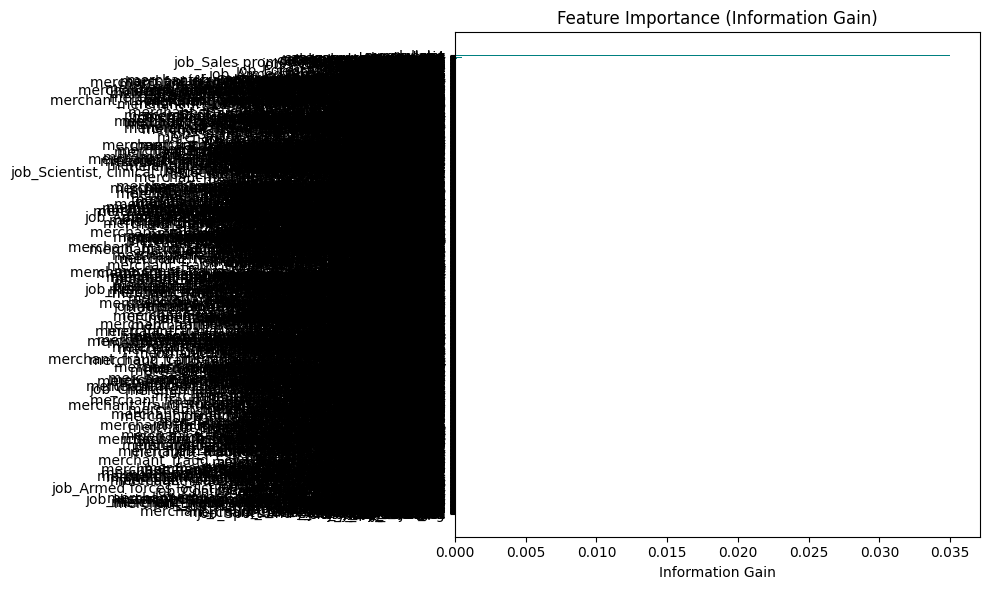

In [22]:
info_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Information_Gain': info_gain
}).sort_values(by='Information_Gain', ascending=False)

# Display table
print(info_df)

# Optional: Plot top features
plt.figure(figsize=(10, 6))
plt.barh(info_df['Feature'], info_df['Information_Gain'], color='teal')
plt.xlabel("Information Gain")
plt.title("Feature Importance (Information Gain)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
top_n = 10
low_n = 5

print(f"\n=== Top {top_n} Most Informative Features ===")
for i in range(top_n):
    feature = info_df.loc[i, 'Feature']
    score = info_df.loc[i, 'Information_Gain']
    print(f"{i+1}. {feature}: IG = {score:.4f} — Highly informative for distinguishing fraud.")


=== Top 10 Most Informative Features ===
1. amt: IG = 0.0263 — Highly informative for distinguishing fraud.
2. zip: IG = 0.0054 — Highly informative for distinguishing fraud.
3. lat: IG = 0.0054 — Highly informative for distinguishing fraud.
4. long: IG = 0.0054 — Highly informative for distinguishing fraud.
5. city_pop: IG = 0.0046 — Highly informative for distinguishing fraud.
6. merch_lat: IG = 0.0350 — Highly informative for distinguishing fraud.
7. merch_long: IG = 0.0353 — Highly informative for distinguishing fraud.
8. age: IG = 0.0175 — Highly informative for distinguishing fraud.
9. trans_hour: IG = 0.0052 — Highly informative for distinguishing fraud.
10. trans_day: IG = 0.0001 — Highly informative for distinguishing fraud.
